<a href="https://colab.research.google.com/github/unna97/fastai/blob/master/flowerclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
!mkdir lily
!mkdir lotus
!mkdir rose
!mkdir flowers
!mv '/content/lily' '/content/flowers/'
!mv '/content/lotus' '/content/flowers/'
!mv '/content/rose' '/content/flowers/'

In [0]:
x=['lily','lotus','rose'] 


In [17]:
for y in x:
  download_images('/content/urls_'+y+'.txt','/content/flowers/'+y, max_pics=200)

Error https://www.thompson-morgan.com/product_images/100/zoom/z-LILY-P94292-A_h.jpg HTTPSConnectionPool(host='www.thompson-morgan.com', port=443): Max retries exceeded with url: /product_images/100/zoom/z-LILY-P94292-A_h.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://www.thompson-morgan.com/product_images/100/zoom/z-TREE-P92243-A_h.jpg HTTPSConnectionPool(host='www.thompson-morgan.com', port=443): Max retries exceeded with url: /product_images/100/zoom/z-TREE-P92243-A_h.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://www.thompson-morgan.com/product_images/100/zoom/z-LILY-T57216-A_h.jpg HTTPSConnectionPool(host='www.thompson-morgan.com', port=443): Max retries exceeded with url: /product_images/100/zoom/z-LILY-T57216-A_h.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'

Error https://www.washingtonpost.com/resizer/iJ2MJZ3N-TX4rxzeoPgXaExu5wI=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/VK6HCQOPHY5MTCFTWHFF3ALVK4.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/blogs/capital-weather-gang/files/2016/07/28208296126_9e3dd21219_o.jpg&w=480 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)


Error https://cdn.gurneys.com/images/475/74041.jpg HTTPSConnectionPool(host='cdn.gurneys.com', port=443): Max retries exceeded with url: /images/475/74041.jpg (Caused by SSLError(CertificateError("hostname 'cdn.gurneys.com' doesn't match either of '*.s3.amazonaws.com', 's3.amazonaws.com'",),))


In [19]:
for c in x:
    print(c)
    verify_images('/content/flowers/'+c, delete=True, max_size=500)

lily


cannot identify image file <_io.BufferedReader name='/content/flowers/lily/00000019.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/lily/00000057.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/lily/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/lily/00000055.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/lily/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/lily/00000002.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/lily/00000003.jpg'>
lotus


Image /content/flowers/lotus/00000050.png has 4 instead of 3 channels
rose


cannot identify image file <_io.BufferedReader name='/content/flowers/rose/00000028.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/rose/00000023.jpeg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/rose/00000096.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/rose/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/rose/00000074.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/rose/00000071.jpeg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/rose/00000003.jpg'>
cannot identify image file <_io.BufferedReader name='/content/flowers/rose/00000041.jpg'>


In [22]:
np.random.seed(42)
data = ImageDataBunch.from_folder('/content/flowers', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (223 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lotus,lotus,lotus,lotus,lotus
Path: /content/flowers;

Valid: LabelList (55 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lotus,lily,rose,lily,rose
Path: /content/flowers;

Test: None

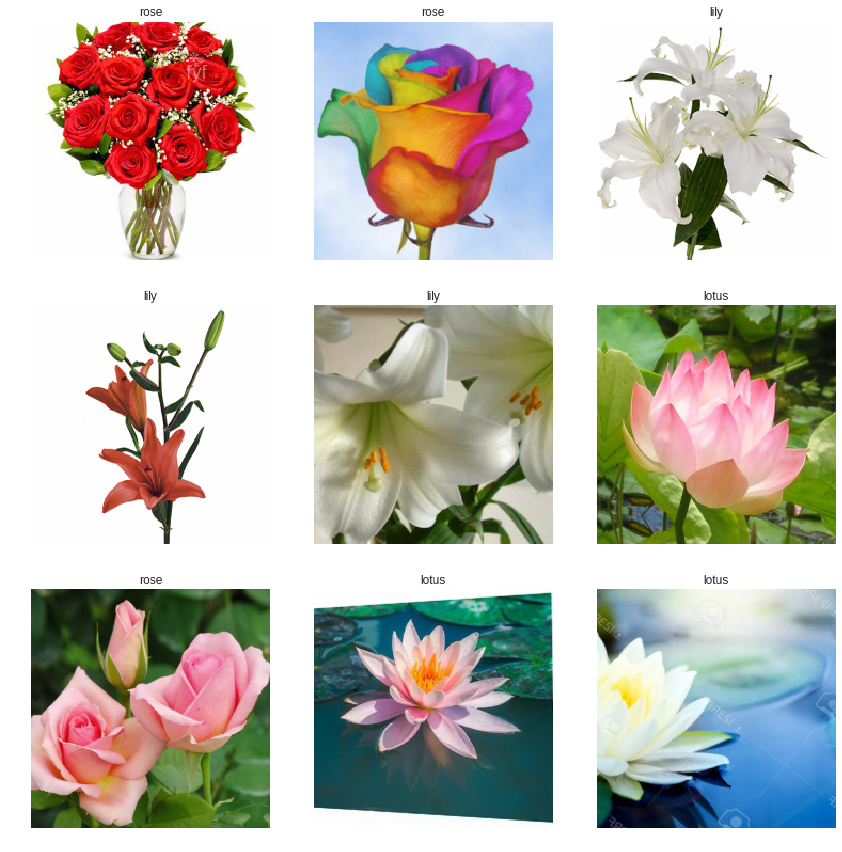

In [21]:
data.show_batch(rows=3)

In [35]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 67521804.96it/s]


In [36]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.539308,0.881595,0.363636
2,1.030710,0.428402,0.109091
3,0.763899,0.273607,0.054545
4,0.615942,0.243967,0.036364


In [48]:
#learn.save('stage-1')
learn.get_preds()

[tensor([[3.2491e-03, 9.8879e-01, 7.9641e-03],
         [9.9770e-01, 2.2039e-03, 9.3246e-05],
         [2.0638e-01, 1.1009e-01, 6.8353e-01],
         [9.4426e-01, 3.9899e-02, 1.5842e-02],
         [5.6905e-03, 8.5995e-04, 9.9345e-01],
         [5.5977e-03, 2.9534e-03, 9.9145e-01],
         [9.6131e-01, 3.7512e-02, 1.1758e-03],
         [5.9204e-03, 6.9363e-04, 9.9339e-01],
         [1.1203e-01, 1.5450e-01, 7.3347e-01],
         [1.3279e-02, 6.1089e-02, 9.2563e-01],
         [3.4111e-02, 9.6015e-01, 5.7407e-03],
         [9.4951e-03, 1.4943e-02, 9.7556e-01],
         [1.0643e-04, 7.1953e-04, 9.9917e-01],
         [9.7308e-01, 2.0227e-02, 6.6968e-03],
         [9.4457e-07, 6.5447e-05, 9.9993e-01],
         [9.9965e-01, 3.2029e-04, 2.8096e-05],
         [1.9435e-03, 6.1602e-04, 9.9744e-01],
         [1.0141e-01, 8.9406e-01, 4.5314e-03],
         [3.2870e-04, 1.8080e-03, 9.9786e-01],
         [3.6842e-03, 1.2971e-03, 9.9502e-01],
         [1.4844e-01, 8.5043e-01, 1.1303e-03],
         [1.1

In [0]:
# learn.unfreeze()
# learn.recorder.plot()
interp = ClassificationInterpretation.from_learner(learn)


In [43]:
#??interp #.plot_confusion_matrix()
interp.most_confused()

[('lily', 'rose', 1), ('rose', 'lily', 1)]

In [50]:
from fastai.widgets import *


In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs,p)

In [0]:
import os

In [0]:
??fastai.widgets